In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('weather_data_2025_cleaned.csv')

In [37]:
df.columns

Index(['date', 'time', 'Cloud Coverage (%)', 'Temperature (Fahrenheit)',
       'Wind speed (mph)', 'rain (inches)', 'relative humidity (%)',
       'visibility (miles)', 'cherry'],
      dtype='object')

In [38]:
df['day_rating'] = 0

# Assign points based on temperature
df.loc[(df['Temperature (Fahrenheit)'] >= 50) & (df['Temperature (Fahrenheit)'] <= 90), 'day_rating'] += 15
df.loc[(df['Temperature (Fahrenheit)'] < 50) | (df['Temperature (Fahrenheit)'] > 90), 'day_rating'] += 7

# Assign points based on wind speed
df.loc[df['Wind speed (mph)'] < 5, 'day_rating'] += 15
df.loc[(df['Wind speed (mph)'] >= 5) & (df['Wind speed (mph)'] < 10), 'day_rating'] += 7
df.loc[df['Wind speed (mph)'] >= 10, 'day_rating'] += 1

# Assign points based on rain
df.loc[df['rain (inches)'] < 1, 'day_rating'] += 15
df.loc[(df['rain (inches)'] >= 1) & (df['rain (inches)'] < 3), 'day_rating'] += 7
df.loc[df['rain (inches)'] >= 3, 'day_rating'] += 1

# Assign points based on cloud coverage
df.loc[df['Cloud Coverage (%)'] < 20, 'day_rating'] += 5
df.loc[(df['Cloud Coverage (%)'] >= 20) & (df['Cloud Coverage (%)'] < 50), 'day_rating'] += 2
df.loc[df['Cloud Coverage (%)'] >= 50, 'day_rating'] += 1

# Assign points based on relative humidity
df.loc[df['relative humidity (%)'] < 50, 'day_rating'] += 2

# Assign points based on visibility
df.loc[df['visibility (miles)'] < 3, 'day_rating'] += 0
df.loc[df['visibility (miles)'] >= 3, 'day_rating'] += 10
df.loc[df['cherry'] == 1, 'day_rating'] += 35

# Print the DataFrame to verify the changes
print(df)

         date      time  Cloud Coverage (%)  Temperature (Fahrenheit)  \
0      1/1/24   0:00:00                  64                     38.30   
1      1/1/24   1:00:00                  53                     37.22   
2      1/1/24   2:00:00                  61                     36.32   
3      1/1/24   3:00:00                  78                     37.04   
4      1/1/24   4:00:00                  79                     36.32   
...       ...       ...                 ...                       ...   
2802  4/29/24  19:00:00                  81                     47.48   
2803  4/29/24  20:00:00                  99                     46.40   
2804  4/29/24  21:00:00                  85                     45.50   
2805  4/29/24  22:00:00                  64                     43.70   
2806  4/29/24  23:00:00                  80                     42.80   

      Wind speed (mph)  rain (inches)  relative humidity (%)  \
0                 1.99           0.00                     9

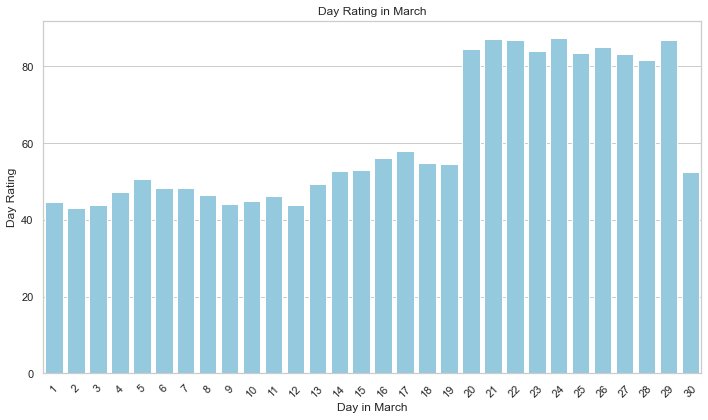

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

# Filter data for March
march_data = df[df['date'].dt.month == 3]

# Group by day and calculate the mean score for each day
daily_scores = march_data.groupby(march_data['date'].dt.day)['day_rating'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_scores, x='date', y='day_rating', color='skyblue')
plt.xlabel('Day in March')
plt.ylabel('Day Rating')
plt.title('Day Rating in March')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Filter data for March 17th
march_17_data = df[(df['date'].dt.month == 3) & (df['date'].dt.day == 21)]

# Group by hour and calculate the mean score for each hour
hourly_scores = march_17_data.groupby(march_17_data['time'])['day_rating'].mean().reset_index()

# Find the hour(s) with the highest day score
max_hour = hourly_scores.loc[hourly_scores['day_rating'].idxmax()]

print("Hour(s) with the highest day score on March 17th:")
print(max_hour)


Hour(s) with the highest day score on March 17th:
time          12:00:00
day_rating        92.0
Name: 3, dtype: object
